# Feature Selection: 
## Forward selection, Backward Elimination, Step-wise

In [114]:
#!pip install mlxtend

In [115]:
import pandas as pd
import numpy as np

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [116]:
MiniData=pd.read_csv("C:/Users/19lya/Documents/Python/Data/ML TeamProj/master_mini.csv")

lz= list(MiniData.columns)

lz.remove('outcome_critical')
lz.remove('intime')
lz.remove('outtime')
lz.remove('ed_los')
lz.remove('outcome_icu_transfer_12h')

In [117]:
X_mini= MiniData[lz]
Y_mini= MiniData[['outcome_critical']]

# 1. Forward Selection

In [118]:
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=10, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [119]:
sfs1 = sfs1.fit(X_mini, Y_mini)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    9.8s finished

[2022-06-09 22:25:50] Features: 1/10 -- score: -0.047987649476352194[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    8.4s finished

[2022-06-09 22:25:59] Features: 2/10 -- score: -0.04502531932929167[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    8.7s finished

[2022-06-09 22:26:08] Features: 3/10 -- score: -0.04374874260398723[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]:

In [120]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['outcome_inhospital_mortality', 'outcome_hospitalization', 'n_icu_90d', 'ed_los_hours', 'triage_acuity', 'chiefcom_abdominal_pain', 'ed_resprate_last', 'ed_dbp_last', 'n_med', 'n_medrecon']


# 2. Backward Elimination

In [121]:
lreg2 = LinearRegression()
sfs2 = sfs(lreg, k_features=10, forward=False, verbose=1, scoring='neg_mean_squared_error')

In [122]:
sfs2 = sfs2.fit(X_mini, Y_mini)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:  1.0min finished
Features: 97/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:   49.8s finished
Features: 96/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   53.6s finished
Features: 95/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:   41.9s finished
Features: 94/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:   54.8s finished
Features: 93/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:  1.2min finished
Features: 92/10[Par

[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:   16.0s finished
Features: 48/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   14.6s finished
Features: 47/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:   14.1s finished
Features: 46/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:   13.9s finished
Features: 45/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   12.6s finished
Features: 44/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:   12.8s finished
Features: 43/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

In [123]:
feat_names2 = list(sfs2.k_feature_names_)
print(feat_names2)

['outcome_inhospital_mortality', 'outcome_hospitalization', 'n_icu_90d', 'ed_los_hours', 'triage_acuity', 'chiefcom_abdominal_pain', 'ed_resprate_last', 'ed_dbp_last', 'n_med', 'n_medrecon']


# 3. Using Random Forest

In [124]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [125]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_mini, Y_mini)

<ipython-input-125-ac29760f3e9f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_mini, Y_mini)


RandomForestClassifier(random_state=0)

<AxesSubplot:>

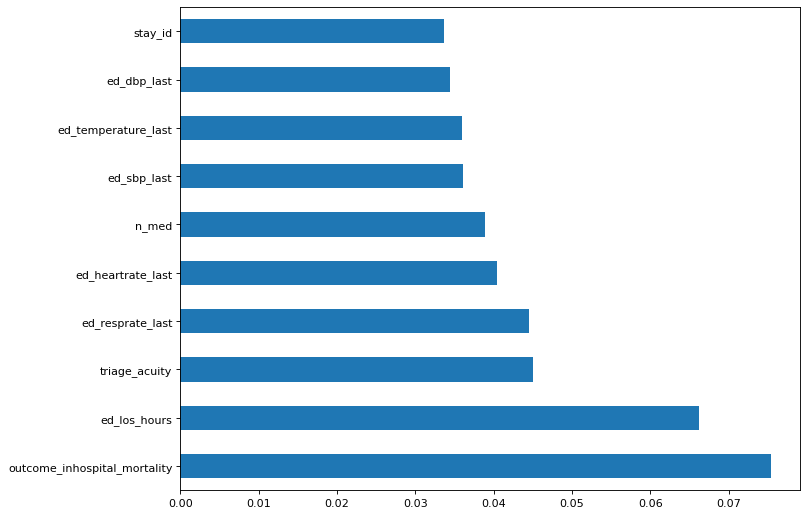

In [126]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
feat_importances = pd.Series(clf.feature_importances_, index= X_mini.columns)
feat_importances.nlargest(10).plot(kind='barh')